# <center> COMP 562 : Inroduction to Machine Learning </center>
## <center> <font color='red'>Lecture 6 : Regularization in Logistic Regression, Multi-Class Logistic Regression </font> </center> 
### <center> Mahmoud Mostapha </center> 
### <center> Department of Computer Science -- UNC Chapel Hill</center>
###  <center> September 19, 2018 </center>

# COMP 562 – Lecture 6

Plan for today

1. Review logistic regression
2. Regularization in logistic regression
3. Assignment 1 overview
4. Bayesian interpretation of penalties
5. Multi-class logistic regression and Softmax 
$$
\renewcommand{\xx}{\mathbf{x}}
\renewcommand{\yy}{\mathbf{y}}
\renewcommand{\zz}{\mathbf{z}}
\renewcommand{\vv}{\mathbf{v}}
\renewcommand{\bbeta}{\boldsymbol{\mathbf{\beta}}}
\renewcommand{\loglik}{\mathcal{LL}}
\renewcommand{\penloglik}{\mathcal{PLL}}
\renewcommand{\likelihood}{\mathcal{L}}
\renewcommand{\Data}{\textrm{Data}}
\renewcommand{\given}{|}
\renewcommand{\MLE}{\textrm{MLE}}
\renewcommand{\tth}{\textrm{th}}
\renewcommand{\Gaussian}[2]{\mathcal{N}\left(#1,#2\right)}
\renewcommand{\norm}[1]{\left\lVert#1\right\rVert}
\renewcommand{\ones}{\mathbf{1}}
\renewcommand{\diag}[1]{\textrm{diag}\left( #1 \right)}
\renewcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\renewcommand{\myexp}[1]{\exp\left\{#1\right\}}
\renewcommand{\mylog}[1]{\log\left\{#1\right\}}
$$

# Last Time -- Logistic Regression

We can generalize linear regression to the (binary) classification setting by making two changes
 1. Replace the Gaussian distribution for $y$ with a Bernoulli distribution
 2. Compute a linear combination of the features but then we pass this through sigmoid function

<img src="./Images/LR.png" width="1200" align="center"/>


# Logistic Regression -- Log-Likelihood for $\pm$ 1 Labels

Probability of a single sample is when $y \in \{-1,+1\}$:

$$
p(y\given\xx,\beta_0,\beta) = \frac{1}{1 + \myexp{-y(\beta_0 + \xx^T\beta)}}
$$

Likelihood function is:

$$
\likelihood(\beta_0,\beta\given\yy,\xx) = \prod_i \frac{1}{1 + \myexp{-y_i(\beta_0 + \xx_i^T\beta)}}
$$

Log-likelihood function is:

$$
\loglik(\beta_0,\beta\given\yy,\xx) = -\sum_i \log\left\{1 + \myexp{-y_i(\beta_0 + \xx_i^T\beta)} \right\}
$$

# Logistic Regression -- Log-Likelihood for $0,1$ Labels

Probability of a single sample is when $y \in \{0,1\}$:

$$
p(y\given\xx,\beta_0,\beta) = \frac{\myexp{y(\beta_0 + \xx^T\beta)}}{1 + \myexp{(\beta_0 + \xx^T\beta)}}
$$

Likelihood function is:

$$
\likelihood(\beta_0,\beta\given\yy,\xx) = \prod_i \frac{\myexp{y_i(\beta_0 + \xx_i^T\beta)}}{1 + \myexp{(\beta_0 + \xx^T\beta)}}
$$

Log-likelihood function is:

$$
\loglik(\beta_0,\beta\given\yy,\xx) = \sum_i y_i(\beta_0 + \xx_i^T\beta) - \log\left\{1 + \myexp{(\beta_0 + \xx_i^T\beta)} \right\}
$$

# Decision Boundary -- Separating Hyperplane

For Logistic regression:

$$p(y=1\given\xx,\beta,\beta_0) = 0.5 \iff \beta_0 + \xx^T\beta = 0$$

<img src="./Images/decisionboundary.gif" width="900" align="center"/>

# Convergence of Optimization of Logistic Regression

If there exists a hyperplane that splits the data perfectly, then log-likelihood can be indefinitely impoved driving weights to infinity

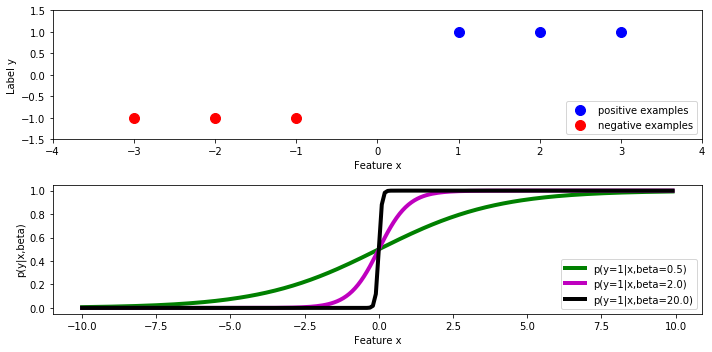

In [13]:
import numpy
import matplotlib.pyplot as plt

def plot_data(xs,ys):
    pos = [i for i in range(len(ys)) if ys[i]>0]
    neg = [i for i in range(len(ys)) if ys[i]<0]
    plt.plot(xs[pos],ys[pos],'b.',
             markersize=20.,
             label='positive examples')
    plt.plot(xs[neg],ys[neg],'r.',
             markersize=20.,
             label='negative examples')

fig = plt.figure(figsize=(10, 5))
def plot_sigmoid(s,color):
    x = numpy.arange(-10.0,10.0,0.1)
    plt.plot(x,1.0/(1.0 + numpy.exp(-s*x)),color,
             linewidth = 4.,
             label='p(y=1|x,beta='+str(s)+')')
ys = numpy.asarray([-1.0,-1.0,-1.0,1.0,1.0,1.0])
xs = numpy.asarray([-3.0,-2.0,-1.0,1.0,2.0,3.0])
plt.subplot(2,1,1)
plot_data(xs,ys)
plt.ylim([-1.5,1.5])
plt.xlim([-4.0,4.0])
plt.xlabel('Feature x')
plt.ylabel('Label y')
plt.legend(loc=4)

plt.subplot(2,1,2)
plot_sigmoid(0.5,'g')
plot_sigmoid(2.0,'m')
plot_sigmoid(20.0,'k')
plt.legend(loc=4)
plt.xlabel('Feature x')
plt.ylabel('p(y|x,beta)')
plt.tight_layout()

def show_figure(fig):
    # create a dummy figure and use its
    # manager to display "fig"
    dummy = plt.figure()
    new_manager = dummy.canvas.manager
    new_manager.canvas.figure = fig
    fig.set_canvas(new_manager.canvas)

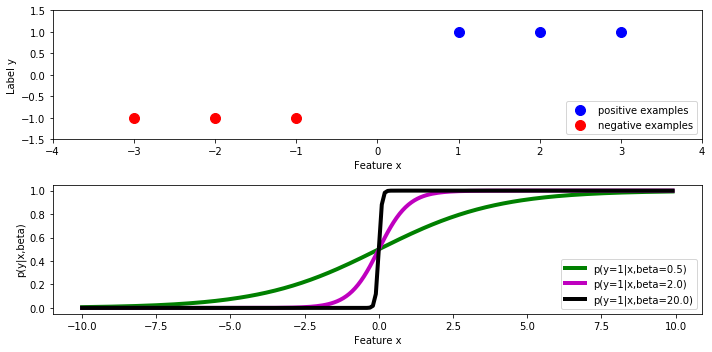

In [14]:
show_figure(fig)
plt.show()

# Ridge Penalty and Logistic Regression

Adding ridge penalty to the logistic regression achieves
1. Shrinkage of weights -- weights no longer explode in separable case
2. Even splitting between correlated weights

Ridge regularized log-likelihood for $\pm$ 1 labels:

$$
\penloglik(\beta_0,\beta\given\yy,\xx) = -\sum_i \log\left\{1 + \myexp{-y_i(\beta_0 + \xx_i^T\beta)} \right\} - \frac{\lambda}{2}\norm{\beta}^2
$$

Ridge regularized log-likelihood for $0,1$ labels:
$$
\penloglik(\beta_0,\beta\given\yy,\xx) =  \sum_i y_i(\beta_0 + \xx_i^T\beta) - \log\left\{1 + \myexp{(\beta_0 + \xx_i^T\beta)} \right\} - \frac{\lambda}{2}\norm{\beta}^2
$$

# Bayesian View of Penalties

We have seen two examples of supervised models
1. Linear regression, $p(y|\xx,\beta)$ where $y \in \mathbb{R}$
2. Logistic regression, $p(y|\xx,\beta)$ where $y \in \{-1,+1\}$

We then utilized log-likelihoods

$$
\loglik(\beta|\yy,X) = \sum_i \log p(y_i|\xx_i,\beta)
$$

and observed that we can add penalties to log-likelihoods

$$
\loglik(\beta|\yy,X) + \lambda f(\beta)
$$

in order to deal with ill-posedness of the problems


# Bayesian View of Penalties

Given a likelihood

$$
p(\Data\given\theta)
$$

Bayesian view of models treats each parameter $\theta$  as just another random variable

This random variable has a distribution called **prior** distribution

$$
p(\theta)
$$

Using Bayes rule we can also compute

$$
\overbrace{p(\theta\given\Data)}^{\textrm{posterior}} = \frac{
\overbrace{p(\Data\given \theta)}^{\textrm{likelihood}}
\overbrace{p(\theta)}^{\textrm{prior}}} {\underbrace{p(\Data)}_{\textrm{evidence}}}
$$

called **posterior** distribution

**Prior** encodes our beliefs **before** seing the data

**Posterior** reflects our updated beliefs **after** seeing the data

# Bayesian View of Penalties 

For example we can assume a Gaussian **prior** on $\beta_i$ to our linear regression model

$$
\begin{aligned}
\beta_i &\sim \Gaussian{0}{\frac{1}{\lambda}},& i>0\\
y &\sim \Gaussian{\beta_0  + \xx^T\beta}{\sigma^2}
\end{aligned}
$$

Then posterior probability of the parameter $\beta_i$:

$$
p(\beta \given \yy,\xx) = \frac{ p(\yy\given\xx,\beta)p(\beta) }{p(\yy\given\xx)}
$$

# Bayesian View of Penalties 

We can now try to find **Maximum-A-Posteriori (MAP)** estimate of $\theta$ 

$$
\arg\max_\beta p(\beta \given \yy,\xx) = \arg\max_\beta \log p(\yy\given\xx,\beta) + \log p(\beta) 
$$

and this is equivalent to

$$
\arg\max_\beta p(\beta \given \yy,\xx) = \arg\max_\beta - \sum_{i=1}^N \frac{1}{2\sigma^2}(y_i - \beta_0 - \xx_i^T\beta) - \sum_{j=1}^p \frac{\lambda}{2}\beta_j^2 +  \textrm{const}
$$

Solving ridge regression is equivalent to finding Maximum-A-Posteriori estimate in Bayesian linear regression with Gaussian prior on weights

# Bayesian view of penalties

Penalties are log-probabilities of the parameters

Maximiziation of penalized log-likelihood is equivalent to maximizing posterior probability of the parameters

Further, uncertainty about parameters can be quantified once we have a distribution

$$
p(\theta\given\Data)
$$

instead of just maximum likelihood estimate

# Assigment 1 Overview 

* Topic: Sentiment Analysis on IMDB Movie Reviews Using Logistic Regression

* You will have until 11:59 PM 9/24 to submit

* You will need to pair with someone for the assigment

<img src="./Images/IMDB.png" width="1300" align="center"/>


# Multiclass Classification

Given a feature vector $\xx$ we wish to predict which of the $C$ classes it came from

If $C=2$ we can use logistic regression. What if $C>2$?

**<font color='red'> Q: Suggest how you might use a two class classifier in training a multiclass classifier? </font>**

# Multiclass Classification

We need to specify 

$$
p(y=1\given\xx),p(y=2\given\xx),...,p(y=C\given\xx)
$$

where we note that

$$
\begin{aligned}
\sum_{c=1}^C p(y=c\given\xx) &= 1.0 \\
p(y=c\given\xx)&\geq 0,& 1\leq c\leq C
\end{aligned}
$$

# Softmax

Sigmoid:

$$
\sigma(z) = \frac{1}{1 + \myexp{-z}} = \frac{\myexp{z}}{1 + \myexp{z}}
$$

Softmax is a generalization of sigmoid:

$$
\sigma(\zz)_j = \frac{\myexp{z_j}}{\sum_{c=1}^C \myexp{z_j}}
$$

For example:

$$
\begin{aligned}
\sigma(\zz)_1 &= \frac{\myexp{z_1}}{\myexp{z_1} + \myexp{z_2} + \myexp{z_3}} \\
\sigma(\zz)_2 &= \frac{\myexp{z_2}}{\myexp{z_1} + \myexp{z_2} + \myexp{z_3}} \\
\sigma(\zz)_3 &= \frac{\myexp{z_3}}{\myexp{z_1} + \myexp{z_2} + \myexp{z_3}} 
\end{aligned}
$$

# Why is it Called Softmax?

Imagine a function that gives back an indicator vector where $1$ for the largest entry, $0$ for others

For example, $[0.1, 0.5, 0.3]$ would map to $[0,1,0]$ because the second entry is the largest

Softmax maps input values into probabilities. The largest value is mapped into the largest probability, but no probability is 0

Hence, softmax is a "soft" version of the above max function

In [15]:
# why softmax
from __future__ import print_function
import numpy
def hardmax(z):
    m = numpy.max(z)
    h = numpy.double(z == m)
    print("z: ",z,"Hardmax(z):",h)
    return h

def softmax(z,verbose=True):
    s = numpy.exp(z)
    s = s/numpy.sum(s)
    if verbose:
        print("z: ",z,"Softmax(z):",s)
    return s

hardmax([0.1,0.5,0.3])
softmax([0.1,0.5,0.3])
softmax([0.01,0.05,0.03])
softmax([10,50,30])
softmax([50,50,30]);


z:  [0.1, 0.5, 0.3] Hardmax(z): [0. 1. 0.]
z:  [0.1, 0.5, 0.3] Softmax(z): [0.2693075  0.40175958 0.32893292]
z:  [0.01, 0.05, 0.03] Softmax(z): [0.32668933 0.34002178 0.33328889]
z:  [10, 50, 30] Softmax(z): [4.24835425e-18 9.99999998e-01 2.06115362e-09]
z:  [50, 50, 30] Softmax(z): [4.99999999e-01 4.99999999e-01 1.03057681e-09]


# Multiclass Logistic Regression and Softmax

We can write out probability of partcular class using softmax

$$
p(y=c\given\xx,\beta_0,B) = \boxed{\frac{ \myexp{\beta_{0,c} + \xx^T\bbeta_c}}{\sum_{k=1}^C\myexp{\beta_{0,k} + \xx^T\bbeta_k}}}
$$

where

$$
B = \left[\bbeta_1 \bbeta_2 ... \bbeta_C \right]
$$

and each $\bbeta_c$ is a vector of class specific feature weights


Note that the $p(y=c\given\cdots)$ is a categorical distribution over $C$ possible states, where probabilities of each state are given by softmax

# Excess of Parameters

Probability of a single sample in logistic regression assuming where $y \in \{0,1\}$

$$
\begin{aligned}
p(y=0\given\xx,\beta_0,\beta) &= \frac{1}{1 + \myexp{\beta_0 + \xx^T\beta)}}\\
p(y=1\given\xx,\beta_0,\beta) &= \frac{\myexp{\beta_0 + \xx^T\beta}}{1 + \myexp{\beta_0 + \xx^T\beta}}
\end{aligned}
$$

But in our multiclass logistic regression for $C=2$ we have

$$
\begin{aligned}
p(y=1\given\xx,\beta_0,B) &= \frac{ \myexp{\beta_{0,1} + \xx^T\bbeta_1}}{\myexp{\beta_{0,1} + \xx^T\bbeta_1} + \myexp{\beta_{0,2} + \xx^T\bbeta_2}} \\
p(y=2\given\xx,\beta_0,B) &= \frac{ \myexp{\beta_{0,2} + \xx^T\bbeta_2}}{\myexp{\beta_{0,1} + \xx^T\bbeta_1} + \myexp{\beta_{0,2} + \xx^T\bbeta_2}} \\
\end{aligned}
$$

Multiclass logistic regression for $C=2$ has more paramters than logistic regresssion

**<font color='red'> Q: Do we need all these parameters? If not, why not and how do we get rid of them? </font>**

# Counting Parameters

$$
p(y=c\given\xx,\beta_0,B) = \boxed{\frac{ \myexp{\beta_{0,c} + \xx^T\bbeta_c}}{\sum_{k=1}^C\myexp{\beta_{0,k} + \xx^T\bbeta_k}}} 
$$

If there are $C$ classes and $p$ features

**<font color='red'>Q: Size of $\beta_0$? </font>**

**<font color='red'> Q: Size of $$
B = \left[\bbeta_1 \bbeta_2 ... \bbeta_C \right]
$$ 
matrix of $\bbeta$ vectors? </font>**

**<font color='red'> Q: Assuming that $\beta_{0,C} = 0$ and $\bbeta_{j,C} = 0$, total parameter count is? </font>**

# One-hot Representation of Labels

Thus far we have been using a random variable $y$ and writing probabilities as

$$
p(y = c\given \cdots) = 
$$


If you give me a discrete variable $z \in \{1,...C\}$ I can construct a C-long binary vector

$$
y_c = \left\{ \begin{aligned}
 1,&& z=c\\
0, && z \neq c
\end{aligned}
\right.
$$

This bit vector is **one-hot** representation of original variable $z$

For example, if C = 5
1. $z = 3$ then  $y = [0 0 1 0 0]$
2. $z = 2$ then  $y = [0 1 0 0 0]$
3. $z = 4$ then   $y = [0 0 0 1 0]$, and $$
\prod_{c=1}^C \theta_c^{y_c} = \theta_1^0\theta_2^0\theta_3^0\theta_4^{\color{red}{1}}\theta_5^0=\theta_4
$$
and
$$
\log\prod_{c=1}^C \theta_c^{y_c} = \sum_c y_c \log \theta_c = \log \theta_4
$$


# Multiclass Logistic Regression -- Log-Likelihood

1. There are $N$ samples, each in one of $C$ classes, and $p$ features
2. Labels are represented using one-hot vectors $y_i$
3. Feature matrix $X$ contains a column of 1s -- corresponding to the bias term
4. First row of weight matrix $B$ are bias terms
5. $\bbeta_{k}$ is $k^\tth$ column of matrix $B$

Dimensions:
* Feature matrix : $X$ $\rightarrow$ $N\times (p+1)$
* Label matrix : $Y$ $\rightarrow$ $N\times C$
* Weight matrix : $B$ $\rightarrow$ $(p+1)\times C$

Likelihood is 

$$
\likelihood(B\given Y,X) = \underbrace{\prod_{i=1}^N}_{\textrm{samples}}\underbrace{\prod_{c=1}^C}_{\textrm{classes}}\left[\frac{ \myexp{\xx_i^T\bbeta_c}}{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}}\right]^{y_{i,c}}
$$

Log-likelihood is
$$
\loglik(\beta_0,B\given Y,X) = \sum_{i=1}^N
\sum_{c=1}^C y_{i,c}\left(\xx_i^T\bbeta_c - \mylog{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}} \right)
$$



# Multiclass Logistic Regression -- Regularized Log-Likelihood


Ridge regularized log-likelihood

$$
\begin{aligned}
\penloglik(B\given Y,X) =& \sum_{i=1}^N
\sum_{c=1}^C y_{i,c}\left(\xx_i^T\bbeta_c - \mylog{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}} \right)\\ &- \frac{\lambda}{2}\sum_{k=1}^C \sum_{j=1}^p \beta_{j,k}^2
\end{aligned}
$$

Note that we keep the last column of $B$ fixed at 0 to get rid of excess parameters

These parameters will not contribute to the regularization -- sum of their squares is 0

# Cross-Entropy

Frequently you will encounter mentions of cross-entropy. It is negative log likelihood of multiclass logistic

$$
\begin{aligned}
\textrm{crossentropy}(B) &= -\loglik(B\given Y,X)\\& = -\sum_{i=1}^N
\sum_{c=1}^C y_{i,c}\left(\xx_i^T\bbeta_c - \mylog{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}} \right)
\end{aligned}
$$

Ridge regularized cross-entropy 

$$
\begin{aligned}
\textrm{crossentropy}(B) =& -\sum_{i=1}^N \sum_{c=1}^C y_{i,c}\left(\xx_i^T\bbeta_c - \mylog{\sum_{k=1}^C\myexp{\xx_i^T\bbeta_k}} \right) \\ 
&{\color{red}{+}}\frac{\lambda}{2}\sum_{k=1}^C \sum_{j=1}^p \beta_{j,k}^2
\end{aligned}
$$

Note the sign flip in the regularization

# Today

1. Review logistic regression
2. Regularized/penalized linear regression
1. Bayesian interpretation of penalties
2. Multiclass classification using logistic regression